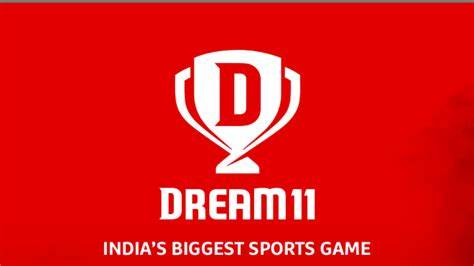

# Welcome to Dream 11 

In [5]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
df.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
df1 = pd.read_csv('IPL Matches 2008-2020.csv')

In [8]:
df1.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [9]:
data = pd.merge(df,df1[['id','date','team1','team2']], on='id')
data['year'] = pd.to_datetime(data['date']).dt.year
data.drop('date',axis=1,inplace=True)

#taking year as input
print("Enter a Year : ")
a=int(input())
season_2020 = data[data['year']==a]

#taking input of team 1
print("\n\n\t\t\t\tEnter a Team 1 : ")
kteam1 = input()
season_t1 = kteam1

#taking input of team 2
print("\n\n\t\t\t\tEnter a Team 2 : ")
kteam2 = input()
season_t2 = kteam2



Enter a Year : 
2020


				Enter a Team 1 : 
Mumbai Indians


				Enter a Team 2 : 
Royal Challengers Bangalore


In [23]:
# It finds bat_score according to point system mentioned above.
def batsman_score(x):
    x["bat_score"]=1*x["runs"]+1*x["fours"]+2*x["sixes"]+4*x["thirty"]+8*x["fifty"]+16*x["century"]
    return x

def get_bat_stats(df,t1,t2):
    # Initialize batting dataframe.
    batting_df = pd.DataFrame(columns=["player","team","runs","fours","sixes","thirty","fifty","century"])

    # Let's use groupby function. Our aim is to find batting score so we'll group our data by batsman.
    for player,details in df.groupby(['batsman','batting_team']):
        total_runs = sum(details["batsman_runs"])

        # If batsman_runs is 4 then we count it as four.
        fours=0
        try:
            fours=details["batsman_runs"].value_counts()[4]
        except:
            fours=0      

        # If batsman_runs is 6 then we count it as six.
        sixes=0
        try:
            sixes=details["batsman_runs"].value_counts()[6]
        except:
            sixes=0 

        thirty=0
        fifty=0
        century=0

        # To find thirty, fifty, century of the player we need to group our dataframe(details) by match id.
        for match,match_details in details.groupby("id"):

            # Find total score of the player by sum up total runs.
            match_score = sum(match_details["batsman_runs"])

            # Accourding to match_score this count thirties, fifties, centuries.
            if match_score>=100:
                century+=1
            elif match_score>=50:
                fifty+=1
            elif match_score>=30:
                thirty+=1

        # Store all the data into batting dataframe.
        batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
    
    # To find bat_score we apply batsman_score function
    batting_df=batting_df.apply(batsman_score,axis=1)
    return batting_df

In [24]:
# Same as bat_score here we find bowl_score through point system mentioned above.
def bowler_score(x):
    x["bowl_score"]=25*x["wickets"]+8*x["lbw_or_bowled"]+4*x["three_wickets"]+8*x["four_wickets"]+16*x["five_wickets"]
    return x

def get_bowl_stats(df,t1,t2):
    # Initialize bowling dataframe.
    bowling_df = pd.DataFrame(columns=["player","team","wickets","lbw_or_bowled","three_wickets","four_wickets","five_wickets"])

    # Let's use groupby function. Our aim is to find bowling score so we'll group our data by bowler.
    for player,details in df.groupby(['bowler','bowling_team']):

        # It finds the length of dataframe where dismissal kind is either lbw or bowled
        lbw_or_bowled=len(details.query('dismissal_kind == "lbw" or dismissal_kind == "bowled"'))

        total_wickets=0
        three_wickets=0
        four_wickets=0
        fifer=0

        # To find three wicket haul, four wicket haul and five wicket haul we should group dataframe(details) again by match id.
        for match,match_details in details.groupby("id"):
            wickets = len(match_details.query('dismissal_kind in ["caught","bowled","lbw","stumped","caught and bowled"]'))
            if wickets>=3:
                three_wickets+=1
            elif wickets>=4:
                four_wickets+=1
            elif wickets>=5:
                fifer+=1
            # Need to add every match wickets into total_wickets to find total wickets of bowler.
            total_wickets+=wickets

        # Store all the data into bowling dataframe.
        bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
        
    # To find bowl_score we apply bowler_score function.
    bowling_df=bowling_df.apply(bowler_score,axis=1) 
    return bowling_df

In [25]:
def get_wicketkeepers(df):
    # Let's find out wicketkeepers from this dataset. To achieve this we'll check dismissal kind, if it is stumpout then store such fielders name into list
    return list(df.query('dismissal_kind == "stumped"')['fielder'].unique())

In [ ]:
Our Dream11 team will have different combinations of players...

Batsman (BAT) - 4

Wicket Keeper (WK) - 1

All Rounder (AR) - 3

Bowler (BWL) - 3

In [27]:
batsmen_2020 = get_bat_stats(season_2020,season_t1,season_t2)
batsmen_2020.head()

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.append({"player":player[0],"team":player[1],"runs":total_runs,"fours":fours,"sixes":sixes,"thirty":thirty,"fifty":fifty,"century":century},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\2157032316.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_df = batting_df.app

,player,team,runs,fours,sixes,thirty,fifty,century,bat_score
0,A Nortje,Delhi Capitals,7,0,0,0,0,0,7
1,AB de Villiers,Royal Challengers Bangalore,454,33,23,2,5,0,581
2,AD Russell,Kolkata Knight Riders,117,9,9,0,0,0,144
3,AJ Finch,Royal Challengers Bangalore,268,28,8,2,1,0,328
4,AJ Tye,Rajasthan Royals,6,0,1,0,0,0,8


In [28]:
dd=batsmen_2020[batsmen_2020['team']==season_t1]

In [29]:
yy=batsmen_2020[batsmen_2020['team']==season_t2]

In [30]:
dd.sort_values(by="bat_score",ascending=False)

,player,team,runs,fours,sixes,thirty,fifty,century,bat_score
35,Ishan Kishan,Mumbai Indians,516,36,30,4,4,0,660
85,Q de Kock,Mumbai Indians,503,46,22,3,4,0,637
103,SA Yadav,Mumbai Indians,480,61,11,3,4,0,607
93,RG Sharma,Mumbai Indians,332,27,19,2,3,0,429
31,HH Pandya,Mumbai Indians,281,14,25,3,1,0,365
47,KA Pollard,Mumbai Indians,268,15,22,3,1,0,347
49,KH Pandya,Mumbai Indians,109,9,5,1,0,0,132
114,SS Tiwary,Mumbai Indians,103,8,3,2,0,0,125
78,NM Coulter-Nile,Mumbai Indians,25,4,0,0,0,0,29
41,JL Pattinson,Mumbai Indians,15,2,0,0,0,0,17


In [31]:
yy.sort_values(by= "bat_score",ascending=False)

,player,team,runs,fours,sixes,thirty,fifty,century,bat_score
19,D Padikkal,Royal Challengers Bangalore,473,51,8,3,5,0,592
1,AB de Villiers,Royal Challengers Bangalore,454,33,23,2,5,0,581
126,V Kohli,Royal Challengers Bangalore,466,23,11,4,3,0,551
3,AJ Finch,Royal Challengers Bangalore,268,28,8,2,1,0,328
100,S Dube,Royal Challengers Bangalore,129,5,9,0,0,0,152
130,Washington Sundar,Royal Challengers Bangalore,111,10,2,1,0,0,129
44,JR Philippe,Royal Challengers Bangalore,78,9,1,2,0,0,97
30,Gurkeerat Singh,Royal Challengers Bangalore,71,8,0,0,0,0,79
16,CH Morris,Royal Challengers Bangalore,34,2,3,0,0,0,42
77,NA Saini,Royal Challengers Bangalore,27,3,0,0,0,0,30


In [32]:
frames = [dd,yy]
result=pd.concat(frames)
display(result)

,player,team,runs,fours,sixes,thirty,fifty,century,bat_score
25,DS Kulkarni,Mumbai Indians,3,0,0,0,0,0,3
31,HH Pandya,Mumbai Indians,281,14,25,3,1,0,365
35,Ishan Kishan,Mumbai Indians,516,36,30,4,4,0,660
40,JJ Bumrah,Mumbai Indians,5,0,0,0,0,0,5
41,JL Pattinson,Mumbai Indians,15,2,0,0,0,0,17
47,KA Pollard,Mumbai Indians,268,15,22,3,1,0,347
49,KH Pandya,Mumbai Indians,109,9,5,1,0,0,132
78,NM Coulter-Nile,Mumbai Indians,25,4,0,0,0,0,29
85,Q de Kock,Mumbai Indians,503,46,22,3,4,0,637
91,RD Chahar,Mumbai Indians,2,0,0,0,0,0,2


# Below are the top 11 Batsmen of given 2 teams

In [36]:
result.sort_values(by="bat_score",ascending=False).head(11)

,player,team,runs,fours,sixes,thirty,fifty,century,bat_score
35,Ishan Kishan,Mumbai Indians,516,36,30,4,4,0,660
85,Q de Kock,Mumbai Indians,503,46,22,3,4,0,637
103,SA Yadav,Mumbai Indians,480,61,11,3,4,0,607
19,D Padikkal,Royal Challengers Bangalore,473,51,8,3,5,0,592
1,AB de Villiers,Royal Challengers Bangalore,454,33,23,2,5,0,581
126,V Kohli,Royal Challengers Bangalore,466,23,11,4,3,0,551
93,RG Sharma,Mumbai Indians,332,27,19,2,3,0,429
31,HH Pandya,Mumbai Indians,281,14,25,3,1,0,365
47,KA Pollard,Mumbai Indians,268,15,22,3,1,0,347
3,AJ Finch,Royal Challengers Bangalore,268,28,8,2,1,0,328


# Bowler Started


In [38]:
bowlers_2020 = get_bowl_stats(season_2020,season_t1,season_t2)
bowlers_2020.head()

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas

C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_df = bowling_df.append({"player":player[0],"team":player[1],"wickets":total_wickets,"lbw_or_bowled":lbw_or_bowled,"three_wickets":three_wickets,"four_wickets":four_wickets,"five_wickets":fifer},ignore_index=True)
C:\Users\sande\AppData\Local\Temp\ipykernel_21104\4287999480.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,player,team,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
0,A Mishra,Delhi Capitals,3,0,0,0,0,75
1,A Nortje,Delhi Capitals,22,9,2,0,0,630
2,A Zampa,Royal Challengers Bangalore,2,0,0,0,0,50
3,AD Russell,Kolkata Knight Riders,5,1,0,0,0,133
4,AJ Tye,Rajasthan Royals,1,0,0,0,0,25


In [39]:
db=bowlers_2020[bowlers_2020['team']==season_t1]

In [40]:
yb=bowlers_2020[bowlers_2020['team']==season_t2]

In [41]:
db.sort_values(by="bowl_score",ascending=False)

,player,team,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
36,JJ Bumrah,Mumbai Indians,27,10,5,0,0,775
90,TA Boult,Mumbai Indians,25,4,3,0,0,669
74,RD Chahar,Mumbai Indians,15,3,0,0,0,399
37,JL Pattinson,Mumbai Indians,11,3,0,0,0,299
43,KH Pandya,Mumbai Indians,6,3,0,0,0,174
66,NM Coulter-Nile,Mumbai Indians,5,0,0,0,0,125
42,KA Pollard,Mumbai Indians,4,0,0,0,0,100
32,J Yadav,Mumbai Indians,1,1,0,0,0,33
24,DS Kulkarni,Mumbai Indians,0,0,0,0,0,0


In [42]:
yb.sort_values(by="bowl_score",ascending=False)

,player,team,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
97,YS Chahal,Royal Challengers Bangalore,21,7,2,0,0,589
61,Mohammed Siraj,Royal Challengers Bangalore,11,3,1,0,0,303
15,CH Morris,Royal Challengers Bangalore,11,2,2,0,0,299
30,I Udana,Royal Challengers Bangalore,8,2,0,0,0,216
96,Washington Sundar,Royal Challengers Bangalore,8,2,0,0,0,216
65,NA Saini,Royal Challengers Bangalore,6,3,0,0,0,174
77,S Dube,Royal Challengers Bangalore,4,1,0,0,0,108
2,A Zampa,Royal Challengers Bangalore,2,0,0,0,0,50
87,Shahbaz Ahmed,Royal Challengers Bangalore,2,0,0,0,0,50
25,DW Steyn,Royal Challengers Bangalore,1,0,0,0,0,25


In [43]:
frames1= [db,yb]
result1=pd.concat(frames1)
display(result1)

,player,team,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
24,DS Kulkarni,Mumbai Indians,0,0,0,0,0,0
32,J Yadav,Mumbai Indians,1,1,0,0,0,33
36,JJ Bumrah,Mumbai Indians,27,10,5,0,0,775
37,JL Pattinson,Mumbai Indians,11,3,0,0,0,299
42,KA Pollard,Mumbai Indians,4,0,0,0,0,100
43,KH Pandya,Mumbai Indians,6,3,0,0,0,174
66,NM Coulter-Nile,Mumbai Indians,5,0,0,0,0,125
74,RD Chahar,Mumbai Indians,15,3,0,0,0,399
90,TA Boult,Mumbai Indians,25,4,3,0,0,669
2,A Zampa,Royal Challengers Bangalore,2,0,0,0,0,50


# Below is the best 11 bowlers of given 2 teams

In [44]:
result1.sort_values(by="bowl_score",ascending=False).head(11)

,player,team,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
36,JJ Bumrah,Mumbai Indians,27,10,5,0,0,775
90,TA Boult,Mumbai Indians,25,4,3,0,0,669
97,YS Chahal,Royal Challengers Bangalore,21,7,2,0,0,589
74,RD Chahar,Mumbai Indians,15,3,0,0,0,399
61,Mohammed Siraj,Royal Challengers Bangalore,11,3,1,0,0,303
15,CH Morris,Royal Challengers Bangalore,11,2,2,0,0,299
37,JL Pattinson,Mumbai Indians,11,3,0,0,0,299
30,I Udana,Royal Challengers Bangalore,8,2,0,0,0,216
96,Washington Sundar,Royal Challengers Bangalore,8,2,0,0,0,216
43,KH Pandya,Mumbai Indians,6,3,0,0,0,174


In [45]:
#we have compete the batting 11 and bowling 11 for a particular team now we will try to make a dream team for particular season
#so we will need allrounders also

In [46]:
merged_data_2020 = pd.merge(batsmen_2020,bowlers_2020,on="player",how="outer").fillna(0)
merged_data_2020.head()

,player,team_x,runs,fours,sixes,thirty,fifty,century,bat_score,team_y,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score
0,A Nortje,Delhi Capitals,7.0,0.0,0.0,0.0,0.0,0.0,7.0,Delhi Capitals,22.0,9.0,2.0,0.0,0.0,630.0
1,AB de Villiers,Royal Challengers Bangalore,454.0,33.0,23.0,2.0,5.0,0.0,581.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,AD Russell,Kolkata Knight Riders,117.0,9.0,9.0,0.0,0.0,0.0,144.0,Kolkata Knight Riders,5.0,1.0,0.0,0.0,0.0,133.0
3,AJ Finch,Royal Challengers Bangalore,268.0,28.0,8.0,2.0,1.0,0.0,328.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,AJ Tye,Rajasthan Royals,6.0,0.0,1.0,0.0,0.0,0.0,8.0,Rajasthan Royals,1.0,0.0,0.0,0.0,0.0,25.0


In [47]:
merged_data_2020['allrounder_score']=(merged_data_2020['bat_score']*merged_data_2020['bowl_score'])/1000
merged_data_2020.head()

,player,team_x,runs,fours,sixes,thirty,fifty,century,bat_score,team_y,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score,allrounder_score
0,A Nortje,Delhi Capitals,7.0,0.0,0.0,0.0,0.0,0.0,7.0,Delhi Capitals,22.0,9.0,2.0,0.0,0.0,630.0,4.410
1,AB de Villiers,Royal Challengers Bangalore,454.0,33.0,23.0,2.0,5.0,0.0,581.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,AD Russell,Kolkata Knight Riders,117.0,9.0,9.0,0.0,0.0,0.0,144.0,Kolkata Knight Riders,5.0,1.0,0.0,0.0,0.0,133.0,19.152
3,AJ Finch,Royal Challengers Bangalore,268.0,28.0,8.0,2.0,1.0,0.0,328.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,AJ Tye,Rajasthan Royals,6.0,0.0,1.0,0.0,0.0,0.0,8.0,Rajasthan Royals,1.0,0.0,0.0,0.0,0.0,25.0,0.200


# List of all-rounders of that season

In [48]:
merged_data_2020.sort_values(by="allrounder_score",ascending=False).head(5)

,player,team_x,runs,fours,sixes,thirty,fifty,century,bat_score,team_y,wickets,lbw_or_bowled,three_wickets,four_wickets,five_wickets,bowl_score,allrounder_score
66,MP Stoinis,Delhi Capitals,352.0,31.0,16.0,2.0,3.0,0.0,447.0,Delhi Capitals,13.0,3.0,1.0,0.0,0.0,353.0,157.791
88,R Tewatia,Rajasthan Royals,255.0,13.0,17.0,3.0,1.0,0.0,322.0,Rajasthan Royals,10.0,1.0,2.0,0.0,0.0,266.0,85.652
104,SM Curran,Chennai Super Kings,186.0,12.0,12.0,1.0,1.0,0.0,234.0,Chennai Super Kings,13.0,1.0,2.0,0.0,0.0,341.0,79.794
36,JC Archer,Rajasthan Royals,113.0,5.0,10.0,0.0,0.0,0.0,138.0,Rajasthan Royals,20.0,6.0,2.0,0.0,0.0,556.0,76.728
82,PJ Cummins,Kolkata Knight Riders,146.0,9.0,8.0,1.0,1.0,0.0,183.0,Kolkata Knight Riders,12.0,5.0,2.0,0.0,0.0,348.0,63.684


In [49]:
wicketkeeper_2020 = get_wicketkeepers(season_2020)

In [52]:
# According to score in particular role we sort data and store players name into dictionary. This dictonary contains players name and players role.
total_batsmen = 4
total_bowlers = 3
total_allrounders = 3
total_wicketkeepers = 1
playing_XI_tournament = {}

playing_XI_tournament['BAT'] = merged_data_2020.sort_values(by="bat_score",ascending=False).head(total_batsmen)['player'].to_list()
playing_XI_tournament['WK'] = merged_data_2020.query('player in @wicketkeeper_2020').sort_values(by="bat_score",ascending=False).head(total_wicketkeepers)['player'].to_list()
playing_XI_tournament['AR'] = merged_data_2020.sort_values(by="allrounder_score",ascending=False).head(total_allrounders)['player'].to_list()
playing_XI_tournament['BWL'] = merged_data_2020.sort_values(by="bowl_score",ascending=False).head(total_bowlers)['player'].to_list()

# Below is best 11 of given season

In [53]:
print('Fantasy dream team for the whole tournament\n', a)
for player_role,players in playing_XI_tournament.items():
    for player in players:
        print("{:15} {}".format(player,player_role))

Fantasy dream team for the whole tournament
 2020
KL Rahul        BAT
S Dhawan        BAT
DA Warner       BAT
Ishan Kishan    BAT
Q de Kock       WK
MP Stoinis      AR
R Tewatia       AR
SM Curran       AR
K Rabada        BWL
JJ Bumrah       BWL
TA Boult        BWL
